In [ ]:
Szakdolgozat/Elmozgatott detektor/Fej fantom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [28]:


# A fájl elérési útvonalának megadása
file_path = 'Elmozgatott detektor/Víz fantom PSA/1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1.hits.npy'

# A fájl beolvasása numpy tömbként
data240MeV = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df240MeV = pd.DataFrame(data240MeV)

# Az adatok megjelenítése
print(df240MeV.head())




   PDGEncoding  trackID  parentID          time  eventID      posX      posY  \
0         2212        1         0  4.001642e-09        0  5.060857 -1.443804   
1         2212        1         0  4.320978e-09        0  5.209542 -1.605119   
2         2212        1         0  4.558413e-09        0  5.359024 -1.694215   
3         2212        1         0  4.588893e-09        0  5.360597 -1.706256   
4         2212        1         0  4.619510e-09        0  5.347623 -1.728677   

         posZ   momDirX   momDirY  ...  volumeID[0]  volumeID[1]  volumeID[2]  \
0  225.354004  0.002896 -0.001839  ...            0            1            0   
1  283.153992  0.002840 -0.002538  ...            0            1            0   
2  326.093994  0.000271 -0.000960  ...            0            1            1   
3  331.593994 -0.001865 -0.002216  ...            0            1            1   
4  337.093994 -0.005169 -0.018032  ...            0            1            1   

   volumeID[3]  volumeID[4]  vol

In [29]:
df240MeV = df240MeV[df240MeV.parentID == 0]
df240MeV['Layer'] = 2*df240MeV["volumeID[2]"]+df240MeV["volumeID[3]"]
column_names240MeV = df240MeV.columns
print("Oszlopnevek:", column_names240MeV)


Oszlopnevek: Index(['PDGEncoding', 'trackID', 'parentID', 'time', 'eventID', 'posX', 'posY',
       'posZ', 'momDirX', 'momDirY', 'momDirZ', 'edep', 'volumeID[0]',
       'volumeID[1]', 'volumeID[2]', 'volumeID[3]', 'volumeID[4]',
       'volumeID[5]', 'volumeID[6]', 'volumeID[7]', 'volumeID[8]',
       'volumeID[9]', 'Layer'],
      dtype='object')


In [30]:

# A fájl elérési útvonalának megadása
file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'

# A fájl beolvasása numpy tömbként
data240MeV_PSA = np.load(file_path)

# A numpy tömb konvertálása pandas DataFrame-é
df240MeV_PSA = pd.DataFrame(data240MeV_PSA)

# Az adatok megjelenítése
print(df240MeV_PSA[(df240MeV_PSA["ParentID"] != 0) & (df240MeV_PSA["ParticleName"] == b'proton') ])

       AtomicNumber       Ekine  Weight  Mass           X           Y      Z  \
3303              1   10.890457     1.0     1   -1.466338    0.470767  224.5   
3304              1    1.423144     1.0     1    5.758682    0.379125  224.5   
4699              1   23.882034     1.0     1  -11.341961   40.635674  224.5   
5613              1    1.979604     1.0     1    1.493972    2.988948  224.5   
6063              1   44.407360     1.0     1   47.403763  384.914307  224.5   
7210              1   19.373556     1.0     1   -6.591055   -1.274023  224.5   
8505              1   62.199429     1.0     1  186.273361  -63.268070 -224.5   
8506              1  130.372803     1.0     1 -173.310242  261.991241 -224.5   
10898             1   32.723480     1.0     1  -93.118782   81.389038  224.5   
13318             1   17.557926     1.0     1 -359.058197  153.790161  224.5   
14757             1   65.039520     1.0     1  194.738419  -66.823212  224.5   
15771             1   12.379096     1.0 

In [31]:
df240MeV_PSA["CreatorProcess"].unique()

array([b'', b'protonInelastic', b'annihil', b'RadioactiveDecay',
       b'neutronInelastic', b'eIoni', b'hIoni', b'eBrem', b'compt',
       b'nCapture', b'conv', b'ionIoni'], dtype=object)

In [34]:
import numpy as np
import pandas as pd

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'


data240MeV_PSA = np.load(file_path)


df240MeV_PSA = pd.DataFrame(data240MeV_PSA)


filtered_data = df240MeV_PSA[(df240MeV_PSA["ParentID"] != 0) & (df240MeV_PSA["ParticleName"] == b'proton')]


r = 1
#np.sqrt(filtered_data['dX']**2 + filtered_data['dY']**2 + filtered_data['dZ']**2)
theta = np.arccos(filtered_data['dZ'] / r)
phi = np.arctan2(filtered_data['dY'], filtered_data['dX'])

theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)


average_theta_degrees = theta_degrees.mean()
average_phi_degrees = phi_degrees.mean()


print("Theta átlaga (fok):", average_theta_degrees)
print("Phi átlaga (fok):", average_phi_degrees)

Theta átlaga (fok): 111.2322769165039
Phi átlaga (fok): 31.586633682250977


In [32]:
import numpy as np
import pandas as pd

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'

# A fájl beolvasása numpy tömbként
data240MeV_PSA = np.load(file_path)

df240MeV_PSA = pd.DataFrame(data240MeV_PSA)

# A DataFrame-ben az adatok szűrése
filtered_data = df240MeV_PSA[(df240MeV_PSA["ParentID"] == 0) & (df240MeV_PSA["ParticleName"] == b'proton')]

# dx, dy, dz oszlopok átlagának és szórásának kiszámítása
average_dx = filtered_data['dX'].mean()
average_dy = filtered_data['dY'].mean()
average_dz = filtered_data['dZ'].mean()
sigma_dx = filtered_data['dX'].std()
sigma_dy = filtered_data['dY'].std()
sigma_dz = filtered_data['dZ'].std()

# A vektor hosszának kiszámítása
r = np.sqrt(average_dx**2 + average_dy**2 + average_dz**2)

# Szögek kiszámítása
theta = np.arccos(average_dz / r)
phi = np.arctan2(average_dy, average_dx)

# Hibaterjedés a szögekre
sigma_theta = np.sqrt(
    ((average_dx / (r * np.sqrt(average_dx**2 + average_dy**2)))**2 * sigma_dx**2) +
    ((average_dy / (r * np.sqrt(average_dx**2 + average_dy**2)))**2 * sigma_dy**2) +
    ((-np.sqrt(average_dx**2 + average_dy**2) / (average_dz**2 + r**2))**2 * sigma_dz**2)
)
sigma_phi = np.sqrt(
    ((-average_dy / (average_dx**2 + average_dy**2))**2 * sigma_dx**2) +
    ((average_dx / (average_dx**2 + average_dy**2))**2 * sigma_dy**2)
)

# Szögek és hibáik fokban
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)
sigma_theta_degrees = np.degrees(sigma_theta)
sigma_phi_degrees = np.degrees(sigma_phi)

# Eredmények kiírása
print("Átlagos dX:", average_dx)
print("Átlagos dY:", average_dy)
print("Átlagos dZ:", average_dz)
print("Theta (radián):", theta)
print("Phi (radián):", phi)
print("Theta (fok):", theta_degrees)
print("Phi (fok):", phi_degrees)
print("Theta hiba (fok):", sigma_theta_degrees)
print("Phi hiba (fok):", sigma_phi_degrees)


Átlagos dX: 1.6311646788835787e-07
Átlagos dY: -4.5596392737934366e-05
Átlagos dZ: 0.9999949336051941
Theta (radián): 4.5596912892268725e-05
Phi (radián): -1.5672189435359114
Theta (fok): 0.0026125106675526496
Phi (fok): -89.7950310375594
Theta hiba (fok): 0.21561218238324367
Phi hiba (fok): 3762.5204872569047


In [ ]:
#Minden egyes részecskére kiszámolni a theta, phi eloszlást, és arra megnézni a statisztikát.

In [35]:
import numpy as np
import pandas as pd

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'


data240MeV_PSA = np.load(file_path)


df240MeV_PSA = pd.DataFrame(data240MeV_PSA)


filtered_data = df240MeV_PSA[(df240MeV_PSA["ParentID"] == 0) & (df240MeV_PSA["ParticleName"] == b'proton')]


r = 1
#np.sqrt(filtered_data['dX']**2 + filtered_data['dY']**2 + filtered_data['dZ']**2)
theta = np.arccos(filtered_data['dZ'] / r)
phi = np.arctan2(filtered_data['dY'], filtered_data['dX'])

theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)


average_theta_degrees = theta_degrees.mean()
average_phi_degrees = phi_degrees.mean()




print("Theta átlaga (fok):", average_theta_degrees)
print("Phi átlaga (fok):", average_phi_degrees)


Theta átlaga (fok): 0.19091418385505676
Phi átlaga (fok): 0.0016299205599352717


In [36]:
import numpy as np
import pandas as pd

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'


data240MeV_PSA = np.load(file_path)

df240MeV_PSA = pd.DataFrame(data240MeV_PSA)


filtered_data = df240MeV_PSA[(df240MeV_PSA["ParentID"] == 0) & (df240MeV_PSA["ParticleName"] == b'proton')]


r = 1
#np.sqrt(filtered_data['dX']**2 + filtered_data['dY']**2 + filtered_data['dZ']**2)


theta = np.arccos(filtered_data['dZ'] / r)
phi = np.arctan2(filtered_data['dY'], filtered_data['dX'])

theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)


average_theta_degrees = theta_degrees.mean()
average_phi_degrees = phi_degrees.mean()
std_theta_degrees = theta_degrees.std()
std_phi_degrees = phi_degrees.std()


n = len(theta_degrees)


stderr_theta = std_theta_degrees / np.sqrt(n)
stderr_phi = std_phi_degrees / np.sqrt(n)


print("Theta átlaga (fok):", average_theta_degrees)
print("Phi átlaga (fok):", average_phi_degrees)
print("Theta hibája (fok):", stderr_theta)
print("Phi hibája (fok):", stderr_phi)


Theta átlaga (fok): 0.19131506979465485
Phi átlaga (fok): 0.0016299205599352717
Theta hibája (fok): 0.0020033303617649203
Phi hibája (fok): 1.047636278265946


In [ ]:
#Eddig jó

In [ ]:
#Az energiákat is megnézni

Theta átlaga (fok): 0.19067679345607758 +/- 0.15493685007095337
Phi átlaga (fok): 0.0014917291700839996 +/- 103.487060546875


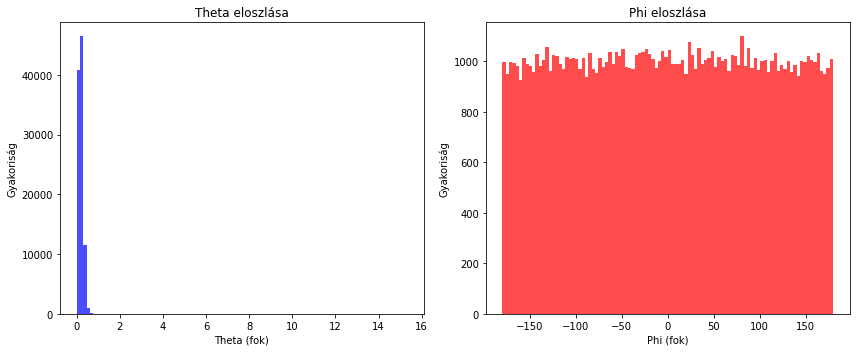

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Calculate the radii and angles
r = np.sqrt(filtered_data_100_000['dX']**2 + filtered_data_100_000['dY']**2 + filtered_data_100_000['dZ']**2)
theta = np.arccos(filtered_data_100_000['dZ'] / r)
phi = np.arctan2(filtered_data_100_000['dY'], filtered_data_100_000['dX'])

# Convert angles from radians to degrees
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Calculate the mean and standard deviation of the angles
average_theta_degrees = theta_degrees.mean()
std_theta_degrees = theta_degrees.std()
average_phi_degrees = phi_degrees.mean()
std_phi_degrees = phi_degrees.std()

# Print the average and the error (standard deviation)
print("Theta átlaga (fok):", average_theta_degrees, "+/-", std_theta_degrees)
print("Phi átlaga (fok):", average_phi_degrees, "+/-", std_phi_degrees)

# Plotting the distribution of Theta and Phi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(theta_degrees, bins=100, color='blue', alpha=0.7)
plt.title("Theta eloszlása")
plt.xlabel("Theta (fok)")
plt.ylabel("Gyakoriság")

plt.subplot(1, 2, 2)
plt.hist(phi_degrees, bins=100, color='red', alpha=0.7)
plt.title("Phi eloszlása")
plt.xlabel("Phi (fok)")
plt.ylabel("Gyakoriság")

plt.tight_layout()
plt.show()


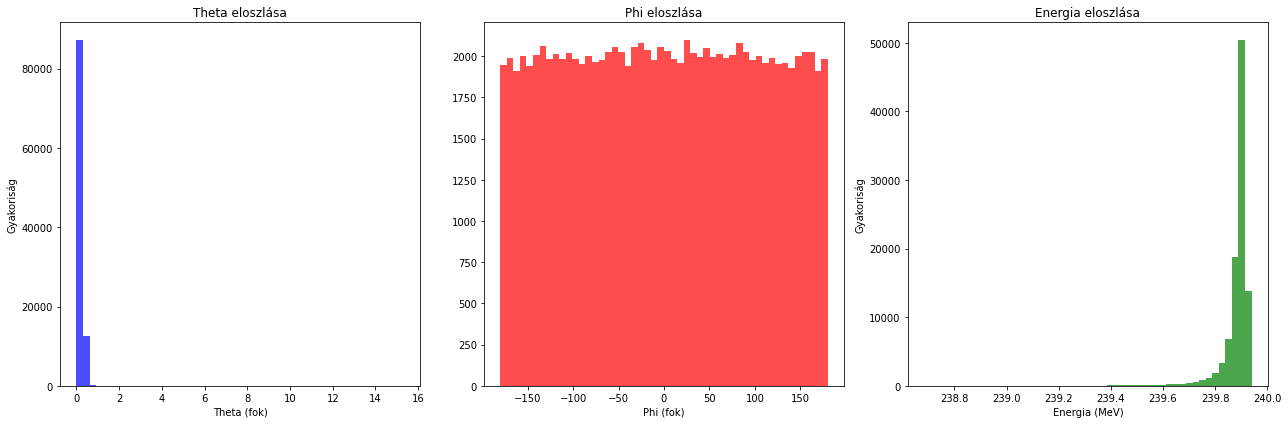

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Calculate the radii and angles
r = np.sqrt(filtered_data_100_000['dX']**2 + filtered_data_100_000['dY']**2 + filtered_data_100_000['dZ']**2)
theta = np.arccos(filtered_data_100_000['dZ'] / r)
phi = np.arctan2(filtered_data_100_000['dY'], filtered_data_100_000['dX'])
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Plotting the distribution of Theta, Phi, and Energy
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(theta_degrees, bins=50, color='blue', alpha=0.7)
plt.title("Theta eloszlása")
plt.xlabel("Theta (fok)")
plt.ylabel("Gyakoriság")

plt.subplot(1, 3, 2)
plt.hist(phi_degrees, bins=50, color='red', alpha=0.7)
plt.title("Phi eloszlása")
plt.xlabel("Phi (fok)")

plt.subplot(1, 3, 3)
plt.hist(filtered_data_100_000['Ekine'], bins=50, color='green', alpha=0.7)
plt.title("Energia eloszlása")
plt.xlabel("Energia (MeV)")
plt.ylabel("Gyakoriság")

plt.tight_layout()
plt.show()


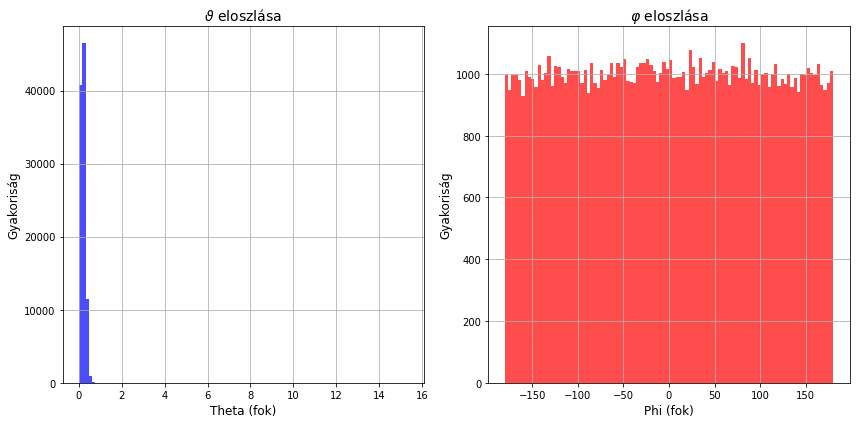

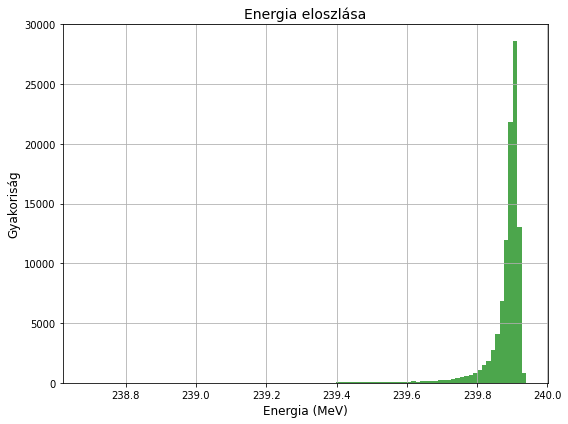

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Calculate the radii and angles
r = np.sqrt(filtered_data_100_000['dX']**2 + filtered_data_100_000['dY']**2 + filtered_data_100_000['dZ']**2)
theta = np.arccos(filtered_data_100_000['dZ'] / r)
phi = np.arctan2(filtered_data_100_000['dY'], filtered_data_100_000['dX'])
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Plotting the distribution of Theta and Phi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(theta_degrees, bins=100, color='blue', alpha=0.7)
plt.title(r"$\vartheta$ eloszlása", fontsize=14)  # Corrected LaTeX formatting
plt.xlabel("Theta (fok)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(phi_degrees, bins=100, color='red', alpha=0.7)
plt.title(r"$\varphi$ eloszlása", fontsize=14)  # Corrected LaTeX formatting
plt.xlabel("Phi (fok)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the distribution of Energy separately
plt.figure(figsize=(8, 6))
plt.hist(filtered_data_100_000['Ekine'], bins=100, color='green', alpha=0.7)
plt.title("Energia eloszlása", fontsize=14)
plt.xlabel("Energia (MeV)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


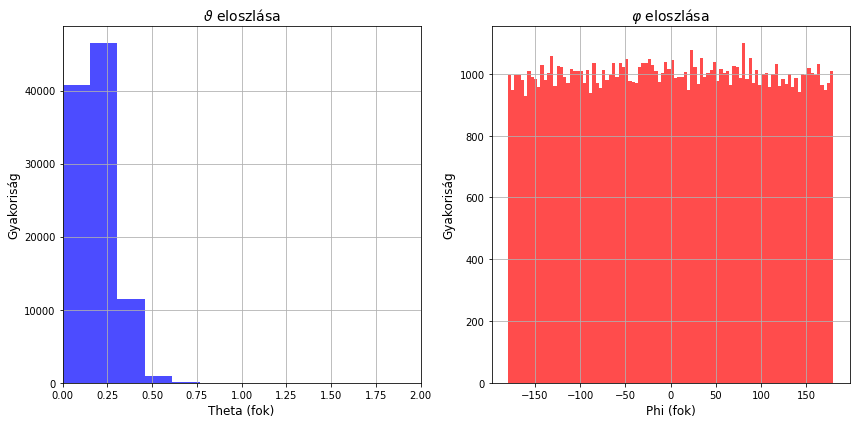

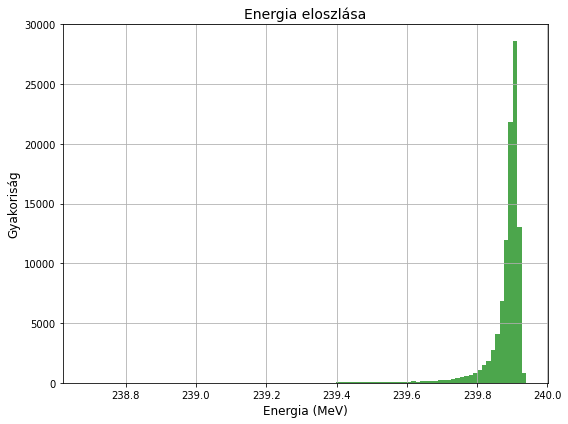

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Calculate the radii and angles
r = np.sqrt(filtered_data_100_000['dX']**2 + filtered_data_100_000['dY']**2 + filtered_data_100_000['dZ']**2)
theta = np.arccos(filtered_data_100_000['dZ'] / r)
phi = np.arctan2(filtered_data_100_000['dY'], filtered_data_100_000['dX'])
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Plotting the distribution of Theta and Phi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(theta_degrees, bins=100, color='blue', alpha=0.7)
plt.title(r"$\vartheta$ eloszlása", fontsize=14)  # Corrected LaTeX formatting
plt.xlabel("Theta (fok)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.xlim(0, 2)  # Set the x-axis limit for theta distribution
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(phi_degrees, bins=100, color='red', alpha=0.7)
plt.title(r"$\varphi$ eloszlása", fontsize=14)  # Corrected LaTeX formatting
plt.xlabel("Phi (fok)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the distribution of Energy separately
plt.figure(figsize=(8, 6))
plt.hist(filtered_data_100_000['Ekine'], bins=100, color='green', alpha=0.7)
plt.title("Energia eloszlása", fontsize=14)
plt.xlabel("Energia (MeV)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


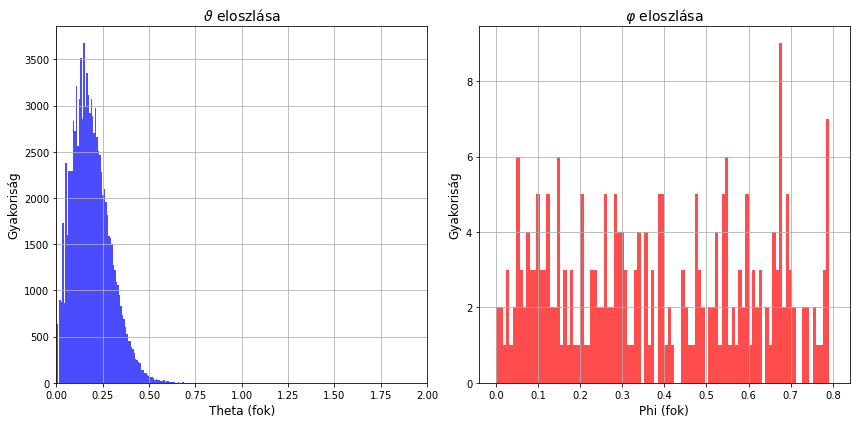

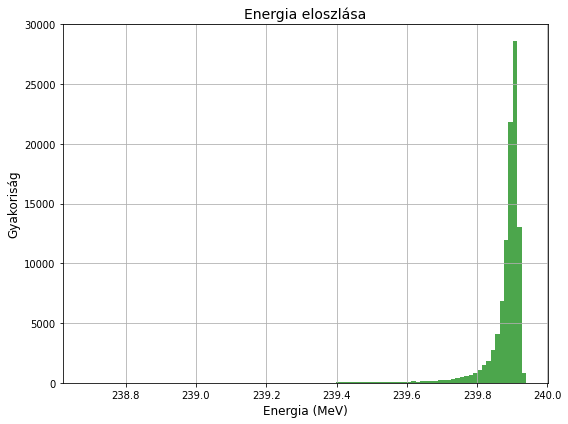

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Calculate the radii and angles
r = np.sqrt(filtered_data_100_000['dX']**2 + filtered_data_100_000['dY']**2 + filtered_data_100_000['dZ']**2)
theta = np.arccos(filtered_data_100_000['dZ'] / r)
phi = np.arctan2(filtered_data_100_000['dY'], filtered_data_100_000['dX'])
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Plotting the distribution of Theta and Phi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(theta_degrees, bins=100, range=(0, 0.8), color='blue', alpha=0.7)
plt.title(r"$\vartheta$ eloszlása", fontsize=14)  # Corrected LaTeX formatting
plt.xlabel("Theta (fok)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.xlim(0, 2)  # Set the x-axis limit for theta distribution
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(phi_degrees, bins=100, color='red', alpha=0.7, range=(0,0.8))
plt.title(r"$\varphi$ eloszlása", fontsize=14)  # Corrected LaTeX formatting
plt.xlabel("Phi (fok)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the distribution of Energy separately
plt.figure(figsize=(8, 6))
plt.hist(filtered_data_100_000['Ekine'], bins=100, color='green', alpha=0.7)
plt.title("Energia eloszlása", fontsize=14)
plt.xlabel("Energia (MeV)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


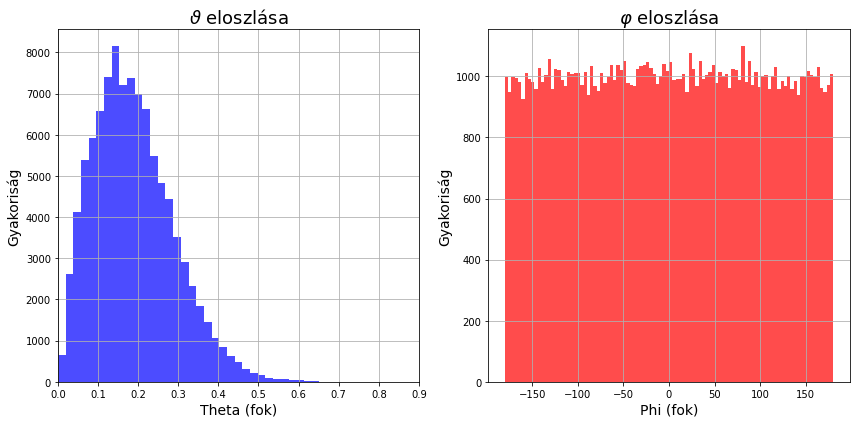

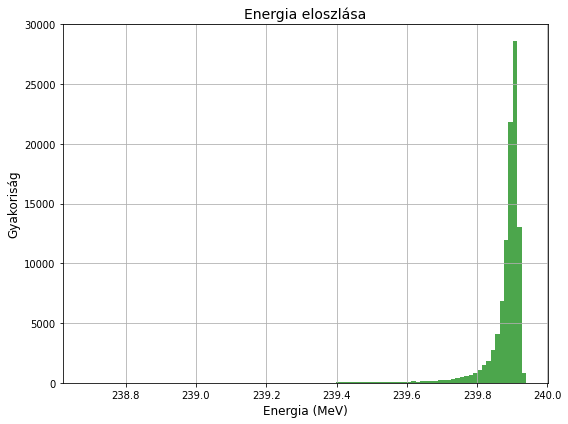

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Calculate the radii and angles
r = np.sqrt(filtered_data_100_000['dX']**2 + filtered_data_100_000['dY']**2 + filtered_data_100_000['dZ']**2)
theta = np.arccos(filtered_data_100_000['dZ'] / r)
phi = np.arctan2(filtered_data_100_000['dY'], filtered_data_100_000['dX'])
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Plotting the distribution of Theta and Phi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(theta_degrees, bins=800, color='blue', alpha=0.7)  # Increased theta resolution by using more bins
plt.title(r"$\vartheta$ eloszlása", fontsize=18)
plt.xlabel("Theta (fok)", fontsize=14)
plt.ylabel("Gyakoriság", fontsize=14)
plt.xlim(0, 0.9)  # Set the x-axis limit for theta distribution
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(phi_degrees, bins=100, color='red', alpha=0.7)
plt.title(r"$\varphi$ eloszlása", fontsize=18)
plt.xlabel("Phi (fok)", fontsize=14)
plt.ylabel("Gyakoriság", fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting the distribution of Energy separately
plt.figure(figsize=(8, 6))
plt.hist(filtered_data_100_000['Ekine'], bins=100, color='green', alpha=0.7)
plt.title("Energia eloszlása", fontsize=14)
plt.xlabel("Energia (MeV)", fontsize=12)
plt.ylabel("Gyakoriság", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-13-beb20cbe5bc2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken kívüli protonok: 98665
3 sigma értéken belüli protonok: 1295


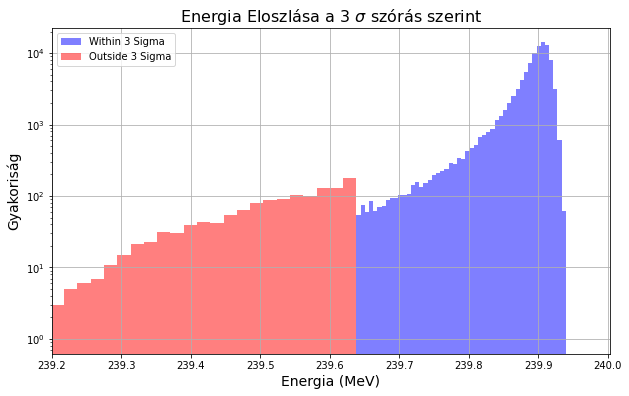

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken kívüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken belüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups 
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.xlim(239.2)
plt.yscale("log")

plt.grid()
plt.show()


In [ ]:
#Képeket cserélni

In [ ]:
#Az átlagenergiát megnézni protonokra, elektronokra, neutronokra
#Mik keltődnek, alfa-részecske, gamma-fotonokra, 

In [ ]:
#Fej fantom kirajzoltatása 3 szogma szerint

<ipython-input-7-7a29b28caad0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken kívüli protonok: 98729
3 sigma értéken belüli protonok: 1238


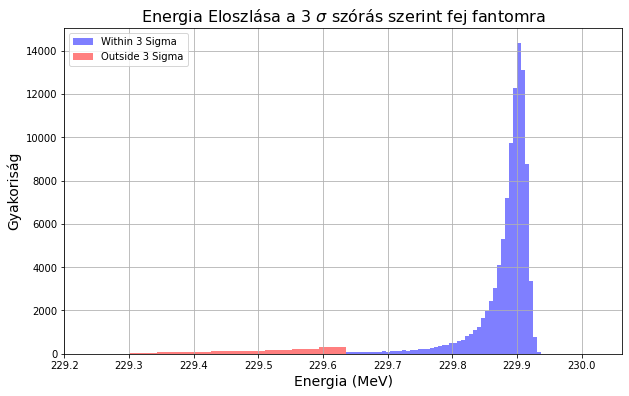

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton fej fantom/1713280433_624407a9-bae9-47e0-b31c-e4ce9b22727b_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken kívüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken belüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups 
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.xlim(229.2)
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint fej fantomra', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.grid()
plt.show()


In [ ]:
#90 fokkal elforgatott fej fantom

<ipython-input-9-5622c8d2df55>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken kívüli protonok: 98711
3 sigma értéken belüli protonok: 1256


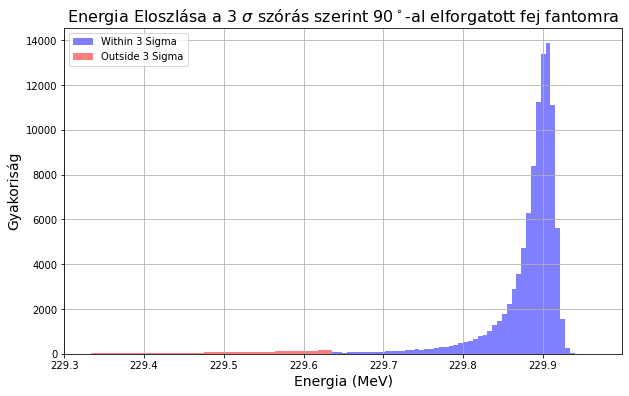

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton fej fantom 90 fok elforgatás/1713431238_b865b4c5-6190-47b4-badf-7e129c8ecadb_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken kívüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken belüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups 
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.xlim(229.3)

plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint ' + r"$90^\circ$" '-al elforgatott fej fantomra', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.grid()
plt.show()


In [ ]:
#A PSA felületén az energiaeloszlásnak a kiszámítása

<ipython-input-63-2c15c7b226f7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


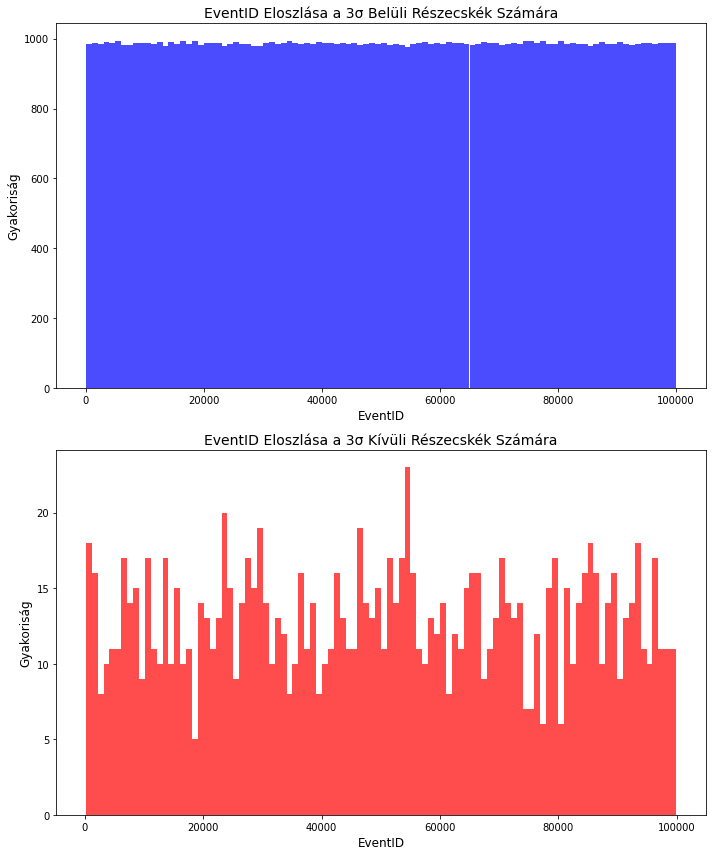

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# Plotting EventId histograms for both groups
plt.figure(figsize=(10, 12))  # Adjusted the figure size to accommodate both plots comfortably

plt.subplot(2, 1, 1)  # First subplot for particles within 3 sigma
plt.hist(within_3_sigma['EventID'], bins=100, color='blue', alpha=0.7)
plt.title('EventID Eloszlása a 3σ Belüli Részecskék Számára', fontsize=14)
plt.xlabel('EventID', fontsize=12)
plt.ylabel('Gyakoriság', fontsize=12)

plt.subplot(2, 1, 2)  # Second subplot for particles outside 3 sigma
plt.hist(outside_3_sigma['EventID'], bins=100, color='red', alpha=0.7)
plt.title('EventID Eloszlása a 3σ Kívüli Részecskék Számára', fontsize=14)
plt.xlabel('EventID', fontsize=12)
plt.ylabel('Gyakoriság', fontsize=12)

plt.tight_layout()  # This adjusts the subplots to fit into the figure area.
plt.show()


<ipython-input-66-f39d14af641f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


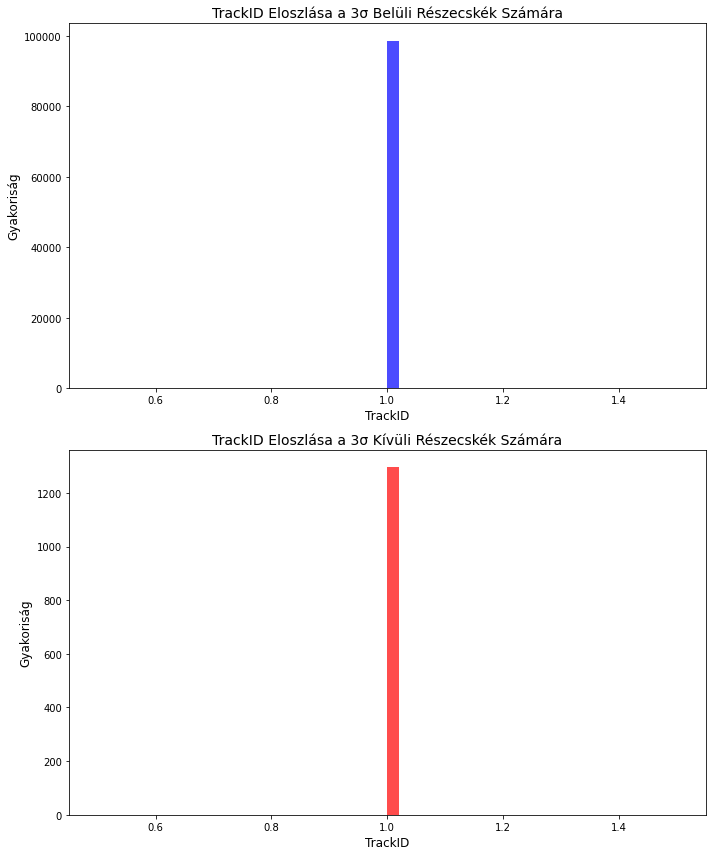

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Fej fantom/100 000 proton víz fantom/1713268697_40ca1430-ccf1-4e7f-a6e0-afd092046aa2_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# Plotting TrackID histograms for both groups
plt.figure(figsize=(10, 12))  # Adjusted the figure size to accommodate both plots comfortably

plt.subplot(2, 1, 1)  # First subplot for particles within 3 sigma
plt.hist(within_3_sigma['TrackID'], bins=50, color='blue', alpha=0.7)
plt.title('TrackID Eloszlása a 3σ Belüli Részecskék Számára', fontsize=14)
plt.xlabel('TrackID', fontsize=12)
plt.ylabel('Gyakoriság', fontsize=12)

plt.subplot(2, 1, 2)  # Second subplot for particles outside 3 sigma
plt.hist(outside_3_sigma['TrackID'], bins=50, color='red', alpha=0.7)
plt.title('TrackID Eloszlása a 3σ Kívüli Részecskék Számára', fontsize=14)
plt.xlabel('TrackID', fontsize=12)
plt.ylabel('Gyakoriság', fontsize=12)

plt.tight_layout()  # This adjusts the subplots to fit into the figure area.
plt.show()


In [ ]:
#Részecskéket megvizsgálni, mi a közös bennük

In [ ]:
#Fej fantomra is megcsinálni, a fej fantomra is is megcsinálni, a fej fantomot 90 fokkal elforgatva is megcsinálni

In [26]:
import numpy as np
import pandas as pd

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'

# A fájl beolvasása numpy tömbként
data240MeV_PSA = np.load(file_path)

df240MeV_PSA = pd.DataFrame(data240MeV_PSA)

# A DataFrame-ben az adatok szűrése
filtered_data = df240MeV_PSA[(df240MeV_PSA["ParentID"] != 0) & (df240MeV_PSA["ParticleName"] == b'proton')]

# dx, dy, dz oszlopok átlagának és szórásának kiszámítása
average_dx = filtered_data['dX'].mean()
average_dy = filtered_data['dY'].mean()
average_dz = filtered_data['dZ'].mean()
sigma_dx = filtered_data['dX'].std()
sigma_dy = filtered_data['dY'].std()
sigma_dz = filtered_data['dZ'].std()

# A vektor hosszának kiszámítása
r = np.sqrt(average_dx**2 + average_dy**2 + average_dz**2)

# Szögek kiszámítása
theta = np.arccos(average_dz / r)
phi = np.arctan2(average_dy, average_dx)

# Hibaterjedés a szögekre
sigma_theta = np.sqrt(
    ((average_dx / (r * np.sqrt(average_dx**2 + average_dy**2)))**2 * sigma_dx**2) +
    ((average_dy / (r * np.sqrt(average_dx**2 + average_dy**2)))**2 * sigma_dy**2) +
    ((-np.sqrt(average_dx**2 + average_dy**2) / (average_dz**2 + r**2))**2 * sigma_dz**2)
)
sigma_phi = np.sqrt(
    ((-average_dy / (average_dx**2 + average_dy**2))**2 * sigma_dx**2) +
    ((average_dx / (average_dx**2 + average_dy**2))**2 * sigma_dy**2)
)

# Szögek és hibáik fokban
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)
sigma_theta_degrees = np.degrees(sigma_theta)
sigma_phi_degrees = np.degrees(sigma_phi)

# Eredmények kiírása
print("Átlagos dX:", average_dx)
print("Átlagos dY:", average_dy)
print("Átlagos dZ:", average_dz)
print("Theta (radián):", theta)
print("Phi (radián):", phi)
print("Theta (fok):", theta_degrees)
print("Phi (fok):", phi_degrees)
print("Theta hiba (fok):", sigma_theta_degrees)
print("Phi hiba (fok):", sigma_phi_degrees)


Átlagos dX: -0.0298591461032629
Átlagos dY: 0.301986426115036
Átlagos dZ: -0.332506000995636
Theta (radián): 2.401836653523025
Phi (radián): 1.6693517754879832
Theta (fok): 137.61510332669474
Phi (fok): 95.64681125813199
Theta hiba (fok): 66.41164382367735
Phi hiba (fok): 116.68356855367188


In [27]:
filtered_data.shape

(12, 17)

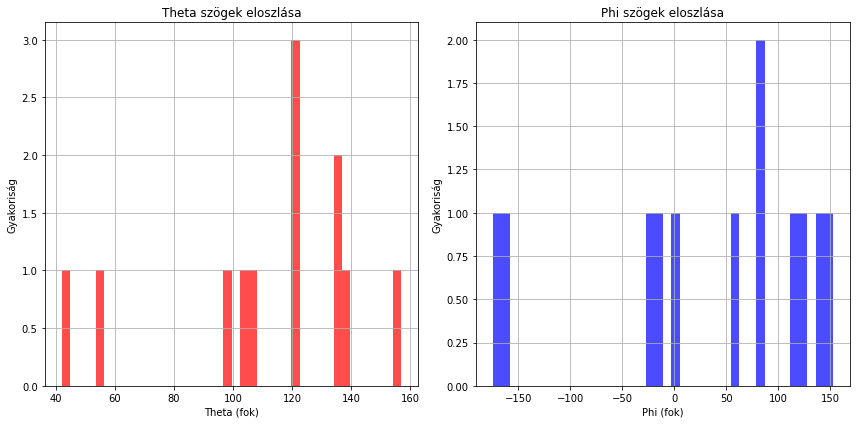

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'

data240MeV_PSA = np.load(file_path)

df240MeV_PSA = pd.DataFrame(data240MeV_PSA)

# Szűrések a releváns adatokra
filtered_data = df240MeV_PSA[(df240MeV_PSA["ParentID"] != 0) & (df240MeV_PSA["ParticleName"] == b'proton')]

# Vektor hosszának és szögek kiszámítása minden sorra
r = np.sqrt(filtered_data['dX']**2 + filtered_data['dY']**2 + filtered_data['dZ']**2)
theta = np.arccos(filtered_data['dZ'] / r)
phi = np.arctan2(filtered_data['dY'], filtered_data['dX'])

# Szögek átalakítása fokba
theta_degrees = np.degrees(theta)
phi_degrees = np.degrees(phi)

# Theta szögek histogramja
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
plt.hist(theta_degrees, bins=40, color='red', alpha=0.7)
plt.title('Theta szögek eloszlása')
plt.xlabel('Theta (fok)')
plt.ylabel('Gyakoriság')
plt.grid(True)

# Phi szögek histogramja
plt.subplot(1, 2, 2)  
plt.hist(phi_degrees, bins=40, color='blue', alpha=0.7)
plt.title('Phi szögek eloszlása')
plt.xlabel('Phi (fok)')
plt.ylabel('Gyakoriság')
plt.grid(True)

plt.tight_layout()
plt.show()


Az átlagos kinetikus energia: 150.8817901611328 MeV


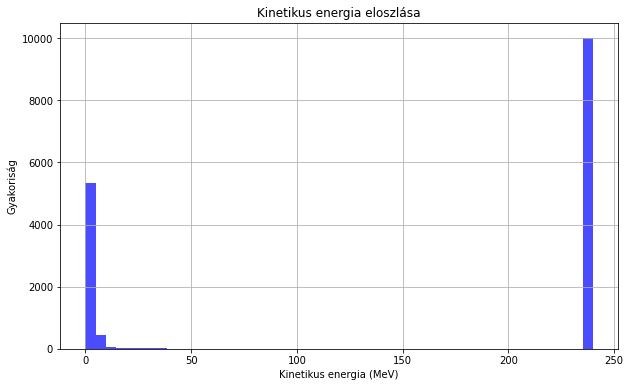

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'

data240MeV_PSA = np.load(file_path)

df240MeV_PSA = pd.DataFrame(data240MeV_PSA)

average_kinetic_energy = df240MeV_PSA['Ekine'].mean()
print("Az átlagos kinetikus energia:", average_kinetic_energy, "MeV")

plt.figure(figsize=(10, 6))
plt.hist(df240MeV_PSA['Ekine'], bins=50, color='blue', alpha=0.7)
plt.title('Kinetikus energia eloszlása')
plt.xlabel('Kinetikus energia (MeV)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()


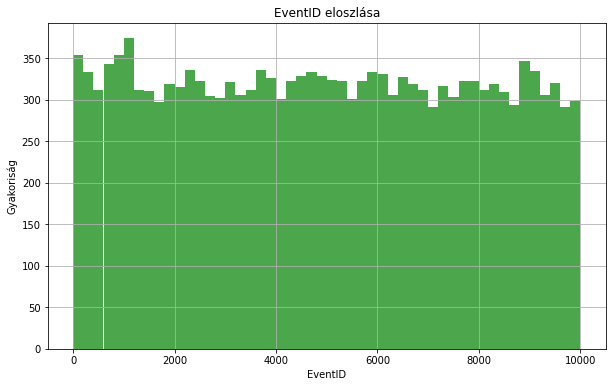

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Elmozgatott detektor/Víz fantom PSA//1713181709_cd2a04e3-07e8-45ee-ae04-8829ba5481f6_water_10000Primaries_1_detector_PSA.npy'

data240MeV_PSA = np.load(file_path)

df240MeV_PSA = pd.DataFrame(data240MeV_PSA)

plt.figure(figsize=(10, 6))
plt.hist(df240MeV_PSA['EventID'], bins=50, color='green', alpha=0.7)
plt.title('EventID eloszlása')
plt.xlabel('EventID')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()


In [ ]:
#Javított Psa



<ipython-input-6-418b4c645f1a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken kívüli protonok: 83156
3 sigma értéken belüli protonok: 626


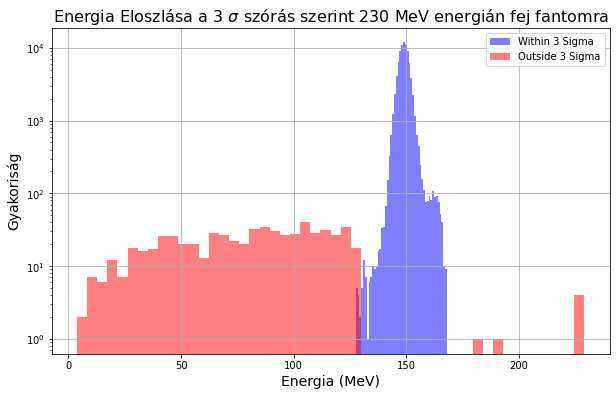

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken kívüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken belüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups 
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint 230 MeV energián fej fantomra', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.yscale("log")

plt.grid()
plt.show()


<ipython-input-12-62b3630769aa>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken belüli protonok: 83156
3 sigma értéken kívüli protonok: 626


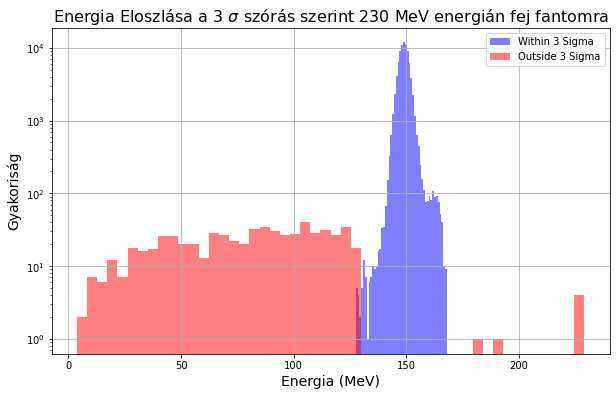

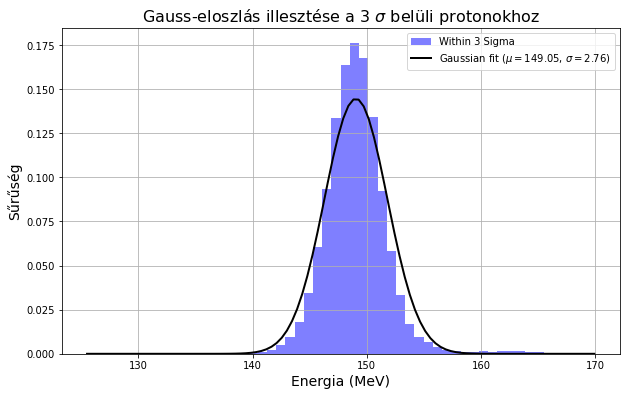

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken belüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken kívüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups
plt.figure(figsize=(10, 6))
n_within, bins_within, _ = plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint 230 MeV energián fej fantomra', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.yscale("log")

plt.grid()
plt.show()

# Fit a Gaussian distribution to the data within 3 sigma
mu, std = norm.fit(within_3_sigma['Ekine'])

# Plot the histogram and the fitted Gaussian distribution
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian fit ($\mu={mu:.2f}$, $\sigma={std:.2f}$)')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Sűrűség', fontsize=14)  # Increased font size
plt.title('Gauss-eloszlás illesztése a 3 ' + r"$\sigma$" + ' belüli protonokhoz', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()

plt.grid()
plt.show()


Fit parameters:  [ 1.00e-01  1.49e+02  5.18e+00  8.89e-01  1.49e+02 -2.21e+00]


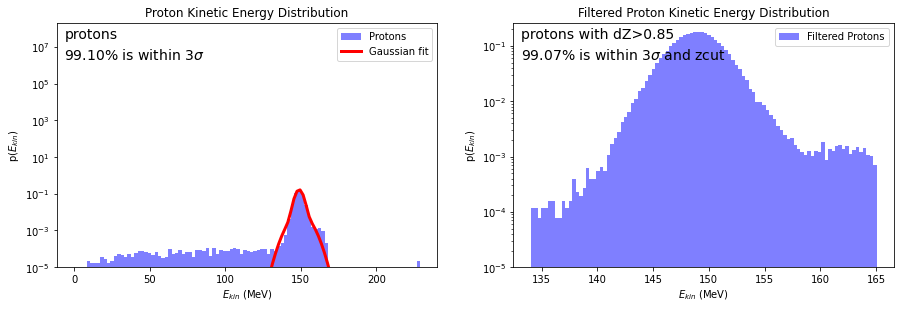

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Histogram data
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Define the Gaussian function
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Initial parameter estimates
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Fit the Gaussian model to the data
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]
np.set_printoptions(precision=2)
print('Fit parameters: ', fit)
np.set_printoptions(precision=8)

# Calculate the number of protons within 3 sigma
sigma_proton = len(filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
])

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

# Plotting the left subplot
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'], bins=100, density=True, alpha=0.5, color='blue', label='Protons')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)')
ax1.set_ylabel(r'p($E_{kin}$)')
ax1.set_yscale('log')
ax1.set_ylim([1e-5, None])  # Set y-axis to start from 10^-5
ax1.set_title("Proton Kinetic Energy Distribution")  # Title for the left plot
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.legend()

# Plotting the right subplot
ax2 = axes[1]
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2]) &
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

ax2.hist(ttt_sigma['Ekine'], bins=100, density=True, alpha=0.5, color='blue', label='Filtered Protons')
ax2.set_xlabel(r'$E_{kin}$ (MeV)')
ax2.set_ylabel(r'p($E_{kin}$)')
ax2.set_yscale('log')
ax2.set_ylim([1e-5, None])  # Set y-axis to start from 10^-5
ax2.set_title("Filtered Proton Kinetic Energy Distribution")  # Title for the right plot
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.show()


Fit parameters:  [ 1.00e-01  1.49e+02  5.18e+00  8.89e-01  1.49e+02 -2.21e+00]


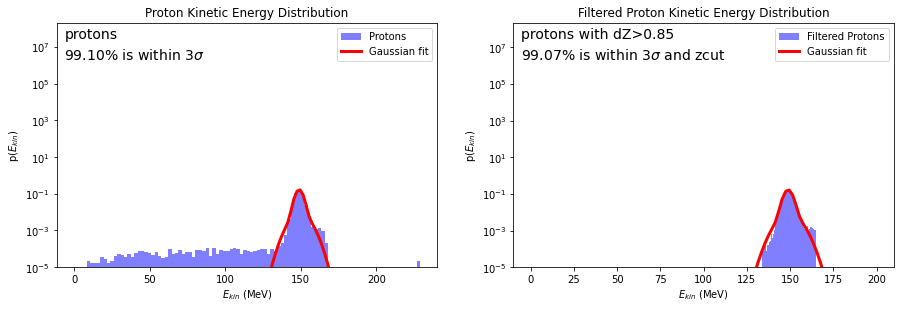

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Histogram data
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Define the Gaussian function
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Initial parameter estimates
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Fit the Gaussian model to the data
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]
np.set_printoptions(precision=2)
print('Fit parameters: ', fit)
np.set_printoptions(precision=8)

# Calculate the number of protons within 3 sigma
sigma_proton = len(filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
])

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

# Plotting the left subplot
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'], bins=100, density=True, alpha=0.5, color='blue', label='Protons')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)')
ax1.set_ylabel(r'p($E_{kin}$)')
ax1.set_yscale('log')
ax1.set_ylim([1e-5, None])  # Set y-axis to start from 10^-5
ax1.set_title("Proton Kinetic Energy Distribution")  # Title for the left plot
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.legend()

# Plotting the right subplot
ax2 = axes[1]
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2]) &
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

ax2.hist(ttt_sigma['Ekine'], bins=100, density=True, alpha=0.5, color='blue', label='Filtered Protons')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)')
ax2.set_ylabel(r'p($E_{kin}$)')
ax2.set_yscale('log')
ax2.set_ylim([1e-5, None])  # Set y-axis to start from 10^-5
ax2.set_title("Filtered Proton Kinetic Energy Distribution")  # Title for the right plot
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.show()


Fit parameters:  [ 1.00e-01  1.49e+02  5.18e+00  8.89e-01  1.49e+02 -2.21e+00]


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


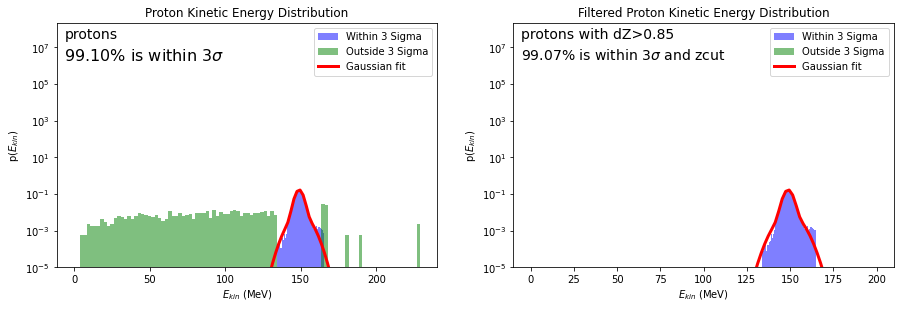

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Histogram data
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Define the Gaussian function
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Initial parameter estimates
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Fit the Gaussian model to the data
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]
np.set_printoptions(precision=2)
print('Fit parameters: ', fit)
np.set_printoptions(precision=8)

# Calculate the number of protons within 3 sigma
sigma_proton = len(filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
])

# Create masks for within and outside 3 sigma
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

# Plotting the left subplot
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)')
ax1.set_ylabel(r'p($E_{kin}$)')
ax1.set_yscale('log')
ax1.set_ylim([1e-5, None])  # Set y-axis to start from 10^-5
ax1.set_title("Proton Kinetic Energy Distribution")  # Title for the left plot
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()


# Plotting the right subplot
ax2 = axes[1]
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2]) &
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)')
ax2.set_ylabel(r'p($E_{kin}$)')
ax2.set_yscale('log')
ax2.set_ylim([1e-5, None])  # Set y-axis to start from 10^-5
ax2.set_title("Filtered Proton Kinetic Energy Distribution")  # Title for the right plot
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.show()


Fit parameters:  [ 1.00e-01  1.49e+02  5.18e+00  8.89e-01  1.49e+02 -2.21e+00]


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


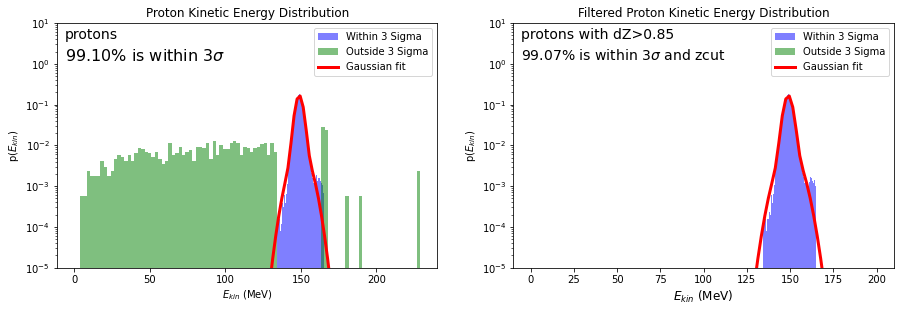

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Histogram data
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Define the Gaussian function
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Initial parameter estimates
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Fit the Gaussian model to the data
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]
np.set_printoptions(precision=2)
print('Fit parameters: ', fit)
np.set_printoptions(precision=8)

# Calculate the number of protons within 3 sigma
sigma_proton = len(filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
])

# Create masks for within and outside 3 sigma
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

# Plotting the left subplot
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)')
ax1.set_ylabel(r'p($E_{kin}$)')
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])  # Set y-axis to range from 10^-5 to 10
ax1.set_title("Proton Kinetic Energy Distribution")  # Title for the left plot
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()


# Plotting the right subplot
ax2 = axes[1]
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2]) &
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=12)
ax2.set_ylabel(r'p($E_{kin}$)')
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])  # Set y-axis to range from 10^-5 to 10
ax2.set_title("Filtered Proton Kinetic Energy Distribution")  # Title for the right plot
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.show()


Fit parameters:  [ 1.00e-01  1.49e+02  5.18e+00  8.89e-01  1.49e+02 -2.21e+00]


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


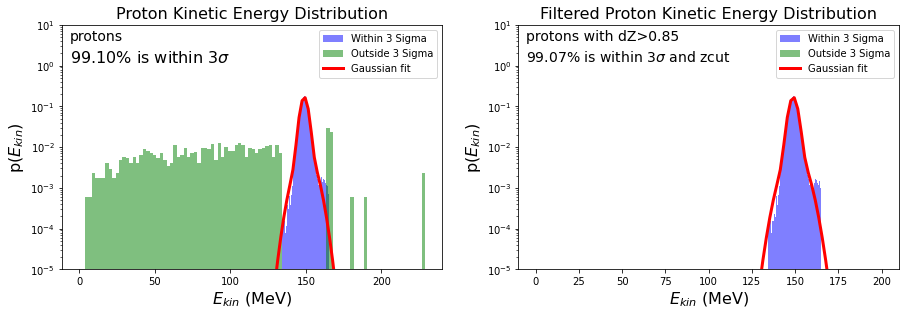

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Histogram data
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Define the Gaussian function
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Initial parameter estimates
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Fit the Gaussian model to the data
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]
np.set_printoptions(precision=2)
print('Fit parameters: ', fit)
np.set_printoptions(precision=8)

# Calculate the number of protons within 3 sigma
sigma_proton = len(filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
])

# Create masks for within and outside 3 sigma
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.5))

# Plotting the left subplot
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=16)
ax1.set_ylabel(r'p($E_{kin}$)', fontsize=16)
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])  # Set y-axis to range from 10^-5 to 10
ax1.set_title("Proton Kinetic Energy Distribution", fontsize=16)  # Title for the left plot
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()


# Plotting the right subplot
ax2 = axes[1]
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) &
    (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2]) &
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=16)
ax2.set_ylabel(r'p($E_{kin}$)', fontsize=16)
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])  # Set y-axis to range from 10^-5 to 10
ax2.set_title("Filtered Proton Kinetic Energy Distribution", fontsize=16)  # Title for the right plot
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.show()


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# 1. Alapadatok beolvasása és szűrése
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &  # Primer protonok
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')  # Csak protonok
]

# 2. Gauss-illesztés az energiaeloszlásra
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Gauss-függvény definiálása
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Kezdeti paraméterek
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Illesztés a hisztogram adatokra
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]

# 3 szigma tartományon belüli protonok
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Számolás
sigma_proton = len(filtered_data_100_000[within_3_sigma_mask])

# 3. Szűrés zcut alapján
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    within_3_sigma_mask &  # 3 szigma tartományon belüli protonok
    (filtered_data_100_000['dZ'] > zcut)  # További szűrés zcut alapján
]
sigma_zcut_proton = len(ttt_sigma)


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


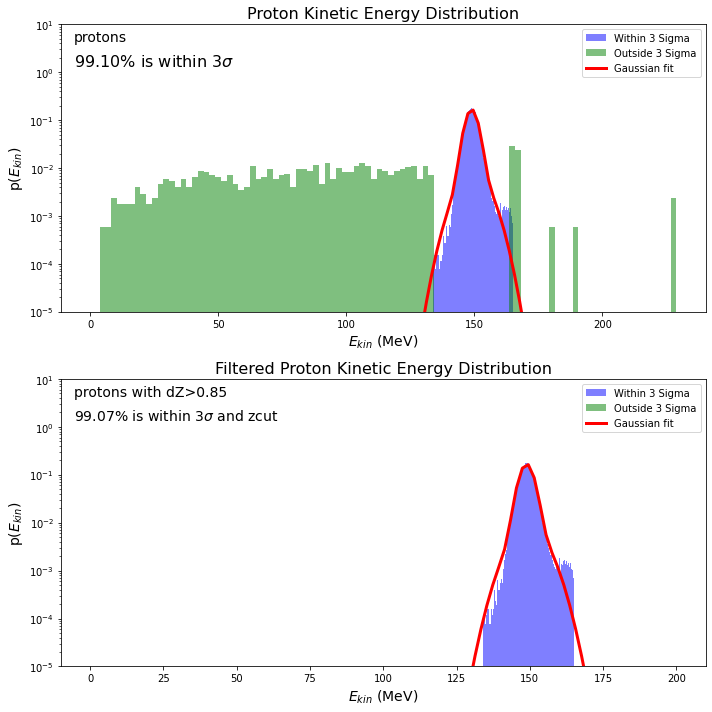

In [28]:
# Eredmények megjelenítése
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Felső subplot: Teljes adatok
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax1.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])
ax1.set_title("Proton Kinetic Energy Distribution", fontsize=16)
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()

# Alsó subplot: Szűrt adatok zcut alapján
ax2 = axes[1]
within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax2.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])
ax2.set_title("Filtered Proton Kinetic Energy Distribution", fontsize=16)
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/90 fokkal elforgatott 230 MeV/1715868308_3a792710-bebd-4115-b210-b410ceb97a12_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# 1. Alapadatok beolvasása és szűrése
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &  # Primer protonok
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')  # Csak protonok
]

# 2. Gauss-illesztés az energiaeloszlásra
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Gauss-függvény definiálása
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Kezdeti paraméterek
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Illesztés a hisztogram adatokra
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]

# 3 szigma tartományon belüli protonok
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Számolás
sigma_proton = len(filtered_data_100_000[within_3_sigma_mask])

# 3. Szűrés zcut alapján
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    within_3_sigma_mask &  # 3 szigma tartományon belüli protonok
    (filtered_data_100_000['dZ'] > zcut)  # További szűrés zcut alapján
]
sigma_zcut_proton = len(ttt_sigma)


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


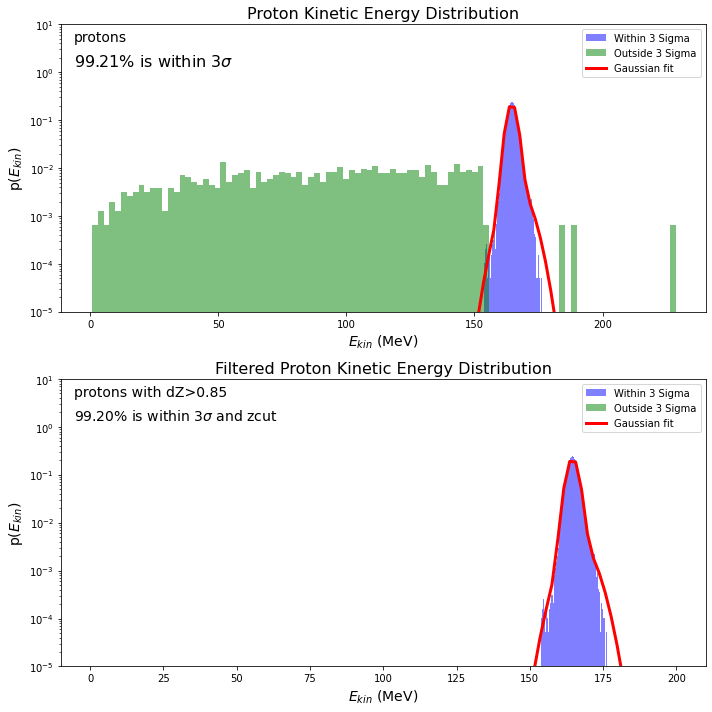

In [30]:
# Eredmények megjelenítése
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Felső subplot: Teljes adatok
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax1.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])
ax1.set_title("Proton Kinetic Energy Distribution, 90˘{\circ} rotated head fantom", fontsize=16)
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()

# Alsó subplot: Szűrt adatok zcut alapján
ax2 = axes[1]
within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax2.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])
ax2.set_title("Filtered Proton Kinetic Energy Distribution, 90˘{\circ} rotated head fantom", fontsize=16)
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

file_path = 'Javitott PSA/Fej fantom/90 fokkal elforgatott 230 MeV/1715868308_3a792710-bebd-4115-b210-b410ceb97a12_head_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# 1. Alapadatok beolvasása és szűrése
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &  # Primer protonok
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')  # Csak protonok
]

# 2. Gauss-illesztés az energiaeloszlásra
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Gauss-függvény definiálása
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Kezdeti paraméterek
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Illesztés a hisztogram adatokra
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]

# 3 szigma tartományon belüli és kívüli protonok
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Számolás
sigma_proton = len(filtered_data_100_000[within_3_sigma_mask])
outside_sigma_proton = len(filtered_data_100_000[outside_3_sigma_mask])

# Eredmények kiírása
print("3 szigma tartományon belüli protonok száma:", sigma_proton)
print("3 szigma tartományon kívüli protonok száma:", outside_sigma_proton)

# 3. Szűrés zcut alapján
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    within_3_sigma_mask &  # 3 szigma tartományon belüli protonok
    (filtered_data_100_000['dZ'] > zcut)  # További szűrés zcut alapján
]
sigma_zcut_proton = len(ttt_sigma)

# Grafikus megjelenítés és a fennmaradó részlet a már korábban leírtak szerint


3 szigma tartományon belüli protonok száma: 85493
3 szigma tartományon kívüli protonok száma: 678


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


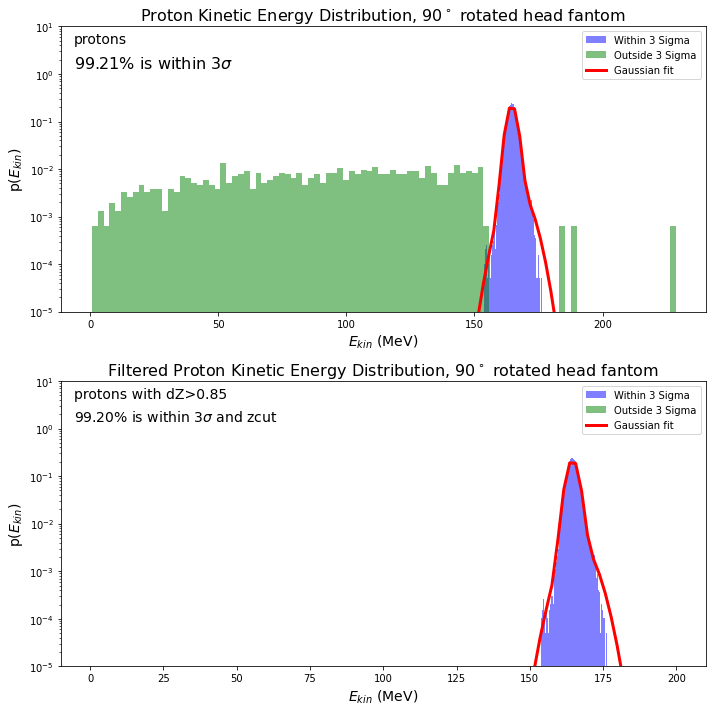

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# Adatok beolvasása és szűrése
file_path = 'Javitott PSA/Fej fantom/90 fokkal elforgatott 230 MeV/1715868308_3a792710-bebd-4115-b210-b410ceb97a12_head_100000Primaries_1_detector_PSA.npy'

data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Primer protonok szűrése
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Hisztogram adatok
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Gauss-függvény definiálása
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Kezdeti paraméterek
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Illesztés a hisztogram adatokra
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]

# 3 szigma tartományon belüli protonok
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Számolás
sigma_proton = len(filtered_data_100_000[within_3_sigma_mask])

# Szűrés zcut alapján
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    within_3_sigma_mask &  
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

# Eredmények megjelenítése
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Felső subplot: Teljes adatok
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax1.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])
ax1.set_title("Proton Kinetic Energy Distribution, 90$^\circ$ rotated head fantom", fontsize=16)
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()

# Alsó subplot: Szűrt adatok zcut alapján
ax2 = axes[1]
within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax2.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])
ax2.set_title("Filtered Proton Kinetic Energy Distribution, 90$^\circ$ rotated head fantom", fontsize=16)
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()


<ipython-input-40-032573ae1bd6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken belüli protonok: 85574
3 sigma értéken kívüli protonok: 597


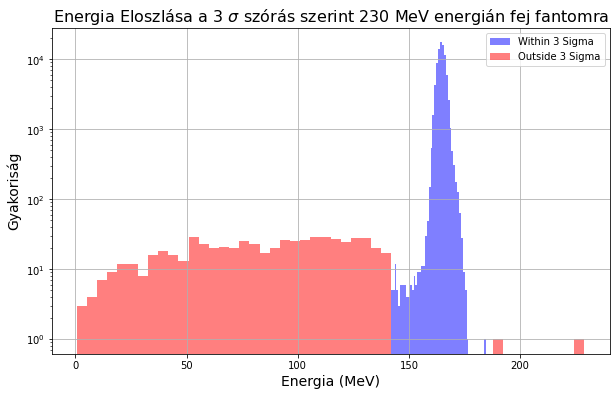

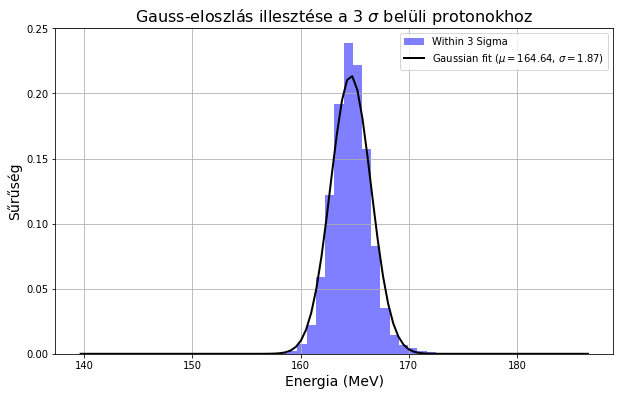

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = 'Javitott PSA/Fej fantom/90 fokkal elforgatott 230 MeV/1715868308_3a792710-bebd-4115-b210-b410ceb97a12_head_100000Primaries_1_detector_PSA.npy'

data240MeV_PSA_100_000 = np.load(file_path)
data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken belüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken kívüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups
plt.figure(figsize=(10, 6))
n_within, bins_within, _ = plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint 230 MeV energián fej fantomra', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.yscale("log")

plt.grid()
plt.show()

# Fit a Gaussian distribution to the data within 3 sigma
mu, std = norm.fit(within_3_sigma['Ekine'])

# Plot the histogram and the fitted Gaussian distribution
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Gaussian fit ($\mu={mu:.2f}$, $\sigma={std:.2f}$)')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Sűrűség', fontsize=14)  # Increased font size
plt.title('Gauss-eloszlás illesztése a 3 ' + r"$\sigma$" + ' belüli protonokhoz', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()

plt.grid()
plt.show()


In [4]:
import numpy as np

# Adatok beolvasása
file_path = 'Javitott PSA/Víz fantom/1715873497_2be3e516-6717-48cf-9a2c-615ae8fc56f8_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)

# Adatok formájának ellenőrzése
print(data240MeV_PSA_100_000.shape)
print(data240MeV_PSA_100_000.dtype)


(161242,)
[('AtomicNumber', '<i4'), ('Ekine', '<f4'), ('Weight', '<f4'), ('Mass', '<i4'), ('X', '<f4'), ('Y', '<f4'), ('Z', '<f4'), ('dX', '<f4'), ('dY', '<f4'), ('dZ', '<f4'), ('ParticleName', 'S256'), ('ProductionVolume', 'S256'), ('CreatorProcess', 'S256'), ('ProcessDefinedStep', 'S256'), ('TrackID', '<i4'), ('ParentID', '<i4'), ('EventID', '<i4'), ('RunID', '<i4')]


(161242,)
[('AtomicNumber', '<i4'), ('Ekine', '<f4'), ('Weight', '<f4'), ('Mass', '<i4'), ('X', '<f4'), ('Y', '<f4'), ('Z', '<f4'), ('dX', '<f4'), ('dY', '<f4'), ('dZ', '<f4'), ('ParticleName', 'S256'), ('ProductionVolume', 'S256'), ('CreatorProcess', 'S256'), ('ProcessDefinedStep', 'S256'), ('TrackID', '<i4'), ('ParentID', '<i4'), ('EventID', '<i4'), ('RunID', '<i4')]


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


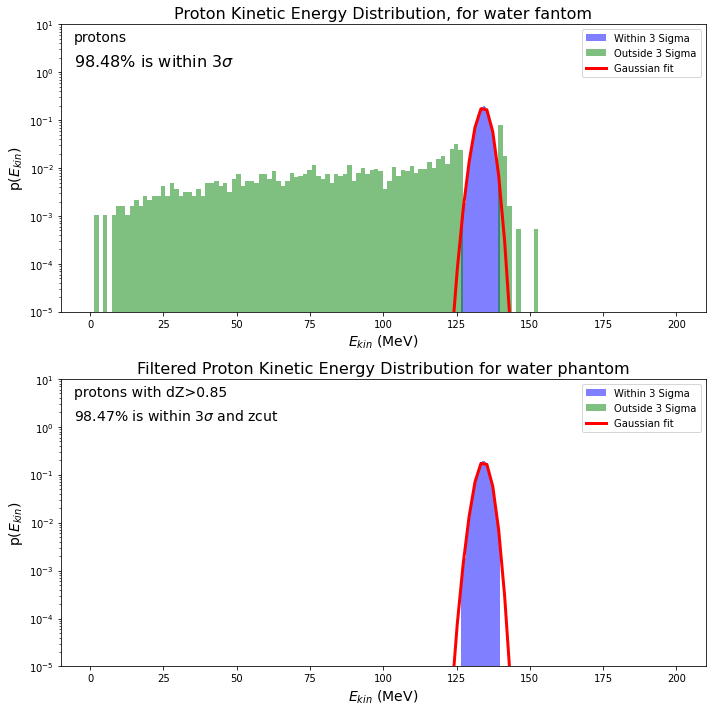

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# Adatok beolvasása és szűrése
file_path = 'Javitott PSA/Víz fantom/1715873497_2be3e516-6717-48cf-9a2c-615ae8fc56f8_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)

# Adatok formájának ellenőrzése
print(data240MeV_PSA_100_000.shape)
print(data240MeV_PSA_100_000.dtype)

# Feltételezve, hogy az adatok oszlopokban vannak tárolva, megadjuk az oszlopneveket
column_names = ['EventID', 'TrackID', 'ParentID', 'StepNumber', 'ParticleName', 'ProcessName', 'VolumeName',
                'ScVolumeName', 'Ekine', 'Edep', 'StepLength', 'X', 'Y', 'Z', 'dX', 'dY', 'dZ']

data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000, columns=column_names)

# Primer protonok szűrése
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Hisztogram adatok
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Gauss-függvény definiálása
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Kezdeti paraméterek
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Illesztés a hisztogram adatokra
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]

# 3 szigma tartományon belüli protonok
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Számolás
sigma_proton = len(filtered_data_100_000[within_3_sigma_mask])

# Szűrés zcut alapján
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    within_3_sigma_mask &  
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

# Eredmények megjelenítése
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Felső subplot: Teljes adatok
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax1.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])
ax1.set_title("Proton Kinetic Energy Distribution, for water fantom", fontsize=16)
ax1.text(0.02, 0.98, 'protons', ha='left', va='top', transform=ax1.transAxes, fontsize=14)
ax1.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$'.format(100. * sigma_proton / all_proton),
         ha='left', va='top', transform=ax1.transAxes, fontsize=16)
ax1.legend()

# Alsó subplot: Szűrt adatok zcut alapján
ax2 = axes[1]
within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax2.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])
ax2.set_title("Filtered Proton Kinetic Energy Distribution for water phantom", fontsize=16)
ax2.text(0.02, 0.98, 'protons with dZ>{0:.2f}'.format(zcut), ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.text(0.02, 0.9, '{0:.2f}% is within 3$\sigma$ and zcut'.format(100. * sigma_zcut_proton / all_proton),
         ha='left', va='top', transform=ax2.transAxes, fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()


(161242,)
[('AtomicNumber', '<i4'), ('Ekine', '<f4'), ('Weight', '<f4'), ('Mass', '<i4'), ('X', '<f4'), ('Y', '<f4'), ('Z', '<f4'), ('dX', '<f4'), ('dY', '<f4'), ('dZ', '<f4'), ('ParticleName', 'S256'), ('ProductionVolume', 'S256'), ('CreatorProcess', 'S256'), ('ProcessDefinedStep', 'S256'), ('TrackID', '<i4'), ('ParentID', '<i4'), ('EventID', '<i4'), ('RunID', '<i4')]
3 szigma tartományon belüli protonok száma: 80136
3 szigma tartományon kívüli protonok száma: 1234
3 szigma és zcut feltételnek megfelelő protonok száma: 80121


/opt/conda/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


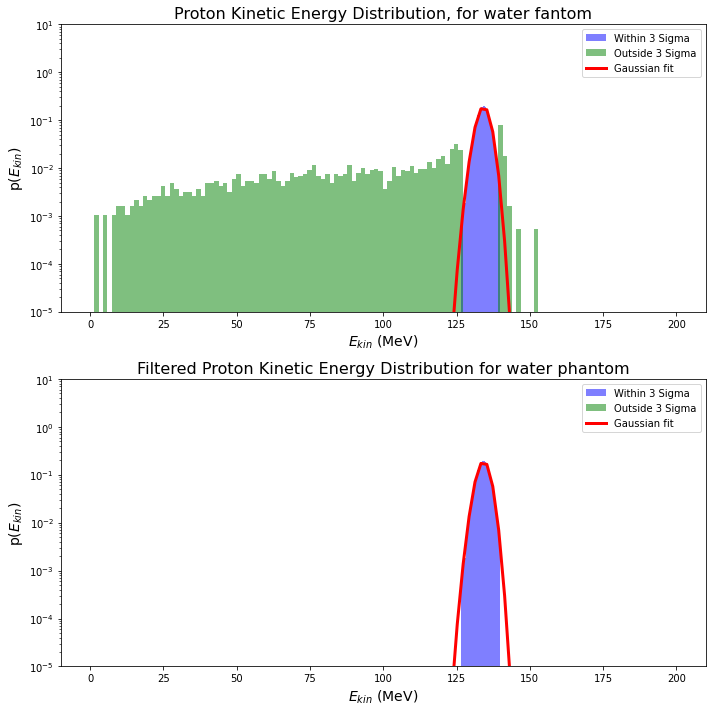

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco

# Adatok beolvasása és szűrése
file_path = 'Javitott PSA/Víz fantom/1715873497_2be3e516-6717-48cf-9a2c-615ae8fc56f8_water_100000Primaries_1_detector_PSA.npy'
data240MeV_PSA_100_000 = np.load(file_path)

# Adatok formájának ellenőrzése
print(data240MeV_PSA_100_000.shape)
print(data240MeV_PSA_100_000.dtype)

# Feltételezve, hogy az adatok oszlopokban vannak tárolva, megadjuk az oszlopneveket
column_names = ['EventID', 'TrackID', 'ParentID', 'StepNumber', 'ParticleName', 'ProcessName', 'VolumeName',
                'ScVolumeName', 'Ekine', 'Edep', 'StepLength', 'X', 'Y', 'Z', 'dX', 'dY', 'dZ']

data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000, columns=column_names)

# Primer protonok szűrése
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

# Hisztogram adatok
counts, bins = np.histogram(filtered_data_100_000['Ekine'], bins=100, density=True)
all_proton = len(filtered_data_100_000)

# Gauss-függvény definiálása
def mygauss(x, a1, m1, s1, a2, m2, s2):
    return (a1 * np.exp(-(x - m1) ** 2 / (2 * s1 * s1)) / np.sqrt(2 * np.pi * s1 * s1) +
            a2 * np.exp(-(x - m2) ** 2 / (2 * s2 * s2)) / np.sqrt(2 * np.pi * s2 * s2))

# Kezdeti paraméterek
initial_params = [0.8, 0.175, 2.76, 0.1, 75, 75]

# Illesztés a hisztogram adatokra
fit = sco.curve_fit(mygauss, 0.5 * (bins[:-1] + bins[1:]), counts, p0=initial_params)[0]

# 3 szigma tartományon belüli protonok
within_3_sigma_mask = (filtered_data_100_000['Ekine'] >= fit[1] - 3 * fit[2]) & (filtered_data_100_000['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_mask = ~within_3_sigma_mask

# Számolás
sigma_proton = len(filtered_data_100_000[within_3_sigma_mask])
outside_sigma_proton = len(filtered_data_100_000[outside_3_sigma_mask])

# Kiírás
print("3 szigma tartományon belüli protonok száma:", sigma_proton)
print("3 szigma tartományon kívüli protonok száma:", outside_sigma_proton)

# Szűrés zcut alapján
zcut = 0.85
ttt_sigma = filtered_data_100_000[
    within_3_sigma_mask &  
    (filtered_data_100_000['dZ'] > zcut)
]
sigma_zcut_proton = len(ttt_sigma)

# Kiírás
print("3 szigma és zcut feltételnek megfelelő protonok száma:", sigma_zcut_proton)

# Eredmények megjelenítése
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Felső subplot: Teljes adatok
ax1 = axes[0]
ax1.hist(filtered_data_100_000['Ekine'][within_3_sigma_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax1.hist(filtered_data_100_000['Ekine'][outside_3_sigma_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
xx = np.linspace(0, 200, 100)
ax1.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax1.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax1.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax1.set_yscale('log')
ax1.set_ylim([1e-5, 10])
ax1.set_title("Proton Kinetic Energy Distribution, for water fantom", fontsize=16)
ax1.legend()

# Alsó subplot: Szűrt adatok zcut alapján
ax2 = axes[1]
within_3_sigma_zcut_mask = (ttt_sigma['Ekine'] >= fit[1] - 3 * fit[2]) & (ttt_sigma['Ekine'] <= fit[1] + 3 * fit[2])
outside_3_sigma_zcut_mask = ~within_3_sigma_zcut_mask

ax2.hist(ttt_sigma['Ekine'][within_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='blue', label='Within 3 Sigma')
ax2.hist(ttt_sigma['Ekine'][outside_3_sigma_zcut_mask], bins=100, density=True, alpha=0.5, color='green', label='Outside 3 Sigma')
ax2.plot(xx, mygauss(xx, *fit), lw=3, color='red', label='Gaussian fit')
ax2.set_xlabel(r'$E_{kin}$ (MeV)', fontsize=14)
ax2.set_ylabel(r'p($E_{kin}$)', fontsize=14)
ax2.set_yscale('log')
ax2.set_ylim([1e-5, 10])
ax2.set_title("Filtered Proton Kinetic Energy Distribution for water phantom", fontsize=16)
ax2.legend()

plt.tight_layout()
plt.show()


<ipython-input-32-f12f4e42e561>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_100_000['Within_3_Sigma'] = three_sigma_range


3 sigma értéken kívüli protonok: 83156
3 sigma értéken belüli protonok: 626


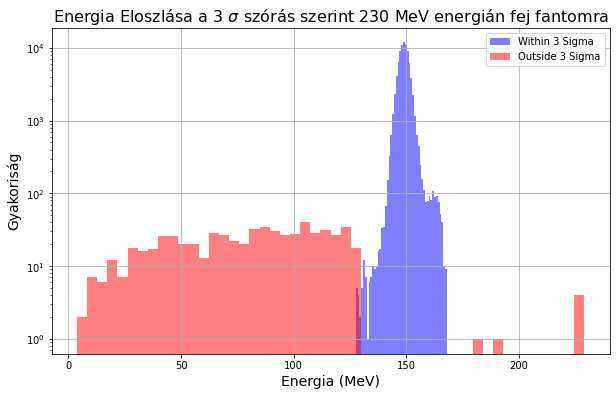

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Javitott PSA/Fej fantom/1713978456_14da27a1-ab2e-467b-b785-fdc537ccb88c_head_100000Primaries_1_detector_PSA.npy'

data240MeV_PSA_100_000 = pd.DataFrame(data240MeV_PSA_100_000)

# Filter the data for primary protons
filtered_data_100_000 = data240MeV_PSA_100_000[
    (data240MeV_PSA_100_000["ParentID"] == 0) &
    (data240MeV_PSA_100_000["ParticleName"] == b'proton')
]

energy_mean = filtered_data_100_000['Ekine'].mean()
energy_std = filtered_data_100_000['Ekine'].std()

# Determine if each particle's energy is within 3 sigma of the mean
three_sigma_range = (filtered_data_100_000['Ekine'] >= (energy_mean - 3 * energy_std)) & (filtered_data_100_000['Ekine'] <= (energy_mean + 3 * energy_std))
filtered_data_100_000['Within_3_Sigma'] = three_sigma_range

# Separate the data into two groups
within_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == True]
outside_3_sigma = filtered_data_100_000[filtered_data_100_000['Within_3_Sigma'] == False]

# shape
print("3 sigma értéken kívüli protonok:", within_3_sigma.shape[0])
print("3 sigma értéken belüli protonok:", outside_3_sigma.shape[0])

# Plot the two groups 
plt.figure(figsize=(10, 6))
plt.hist(within_3_sigma['Ekine'], bins=50, alpha=0.5, label='Within 3 Sigma', color='blue')
plt.hist(outside_3_sigma['Ekine'], bins=50, alpha=0.5, label='Outside 3 Sigma', color='red')
plt.xlabel('Energia (MeV)', fontsize=14)  # Increased font size
plt.ylabel('Gyakoriság', fontsize=14)  # Increased font size
plt.title('Energia Eloszlása a 3 ' + r"$\sigma$" + ' szórás szerint 230 MeV energián fej fantomra', fontsize=16)  # Corrected LaTeX and increased font size
plt.legend()
plt.yscale("log")

plt.grid()
plt.show()


In [ ]:
#Csak elsődleges protonra megcsinálni
#Csak primary protonok ábrázolása kontúrral együtt
#Hány nem primary proton esik bele a kijelölt tartományba
#Százalékban mennyi esik bele
